In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
(X_train , y_train) , (X_test, y_test) = cifar10.load_data()

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
y_train.shape

(50000, 1)

In [28]:
y_test.shape

(10000, 1)

In [29]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [30]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [31]:
y_train.shape

(50000,)

In [32]:
len(np.unique(y_train))

10

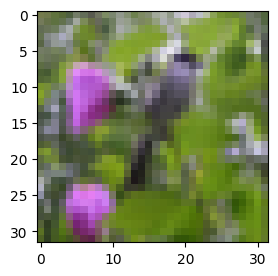

In [33]:
plt.figure(figsize = (3,3))
plt.imshow(X_train[300])
plt.show()

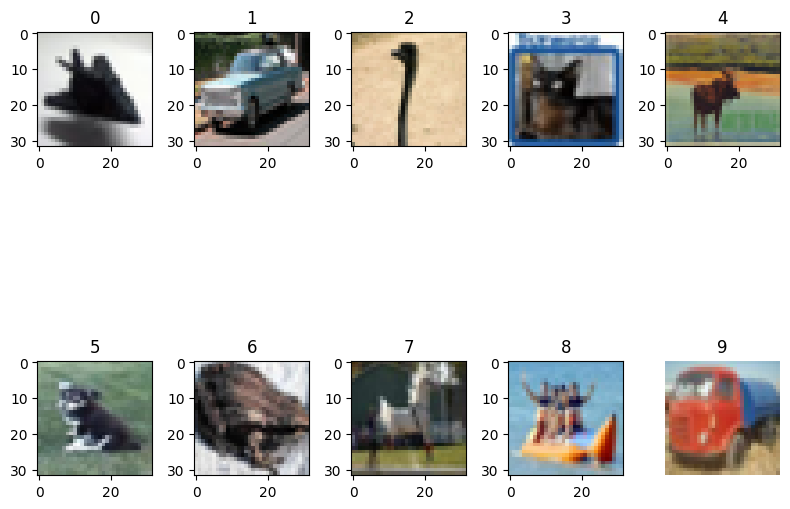

In [34]:
fig , axes = plt.subplots(2,5,figsize = (8,8))
i,k = 0,0
while k < 10:
    if y_train[i] == k:
        ax = axes[k//5, k%5]
        ax.imshow(X_train[i])
        ax.set_title(y_train[i])
        plt.axis('off')
        k += 1
    i += 1
plt.tight_layout()
plt.show()

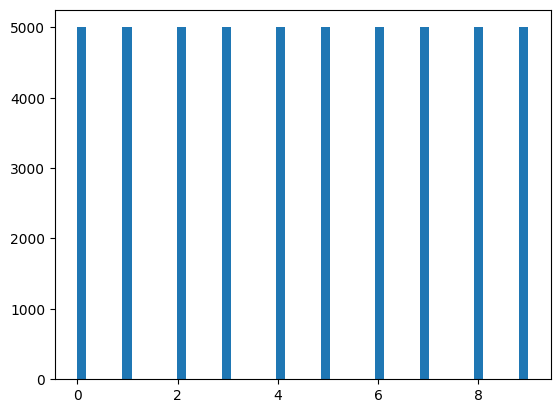

In [35]:
plt.hist(y_train,bins = 50)
plt.show()

In [36]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

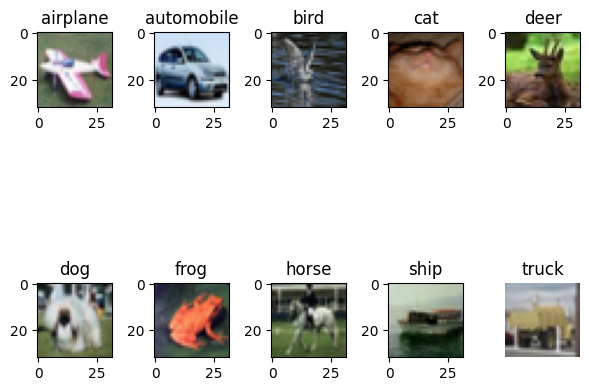

In [37]:
fig , axes = plt.subplots(2,5,figsize = (6,6))
i,k = 5000,0
while k < 10:
    if y_train[i] == k:
        ax = axes[k//5, k%5]
        ax.imshow(X_train[i])
        ax.set_title(classes[k])
        plt.axis('off')
        k += 1
    i += 1
plt.tight_layout()
plt.show()

In [38]:
np.isnan(X_train).sum()

np.int64(0)

In [39]:
X_train[0,0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [40]:
X_train = X_train/255 #Making in the range of 0-1
X_test = X_test/255

In [41]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Training a neural network for comparison

In [65]:
nn = Sequential([
    Flatten(),
    Dense(100,activation = 'relu'),
    Dense(50,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

nn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

nn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2815 - loss: 1.9758
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3778 - loss: 1.7321
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4064 - loss: 1.6543
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4280 - loss: 1.6066
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4331 - loss: 1.5774
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4513 - loss: 1.5437
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4567 - loss: 1.5275
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4616 - loss: 1.5009
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4654 - loss: 1.4975
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4664 - loss: 1.4823


In [66]:
nn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4605 - loss: 1.5270


[1.5352721214294434, 0.4528000056743622]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


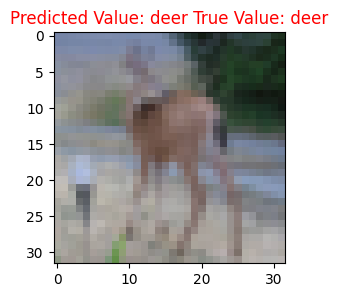

In [67]:
plt.figure(figsize = (3,3))
plt.imshow(X_test[100])
plt.title(f"Predicted Value: {classes[np.argmax(nn.predict(X_test[100].reshape(-1,32,32,3)))]} True Value: {classes[y_test[100]]}",color = 'red')
plt.show()

In [73]:
print(classification_report(y_test,np.argmax(nn.predict(X_test),axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.53      0.45      0.48      1000
           1       0.60      0.52      0.56      1000
           2       0.36      0.26      0.30      1000
           3       0.39      0.19      0.26      1000
           4       0.35      0.54      0.43      1000
           5       0.46      0.30      0.36      1000
           6       0.51      0.46      0.49      1000
           7       0.38      0.69      0.49      1000
           8       0.59      0.53      0.56      1000
           9       0.47      0.58      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


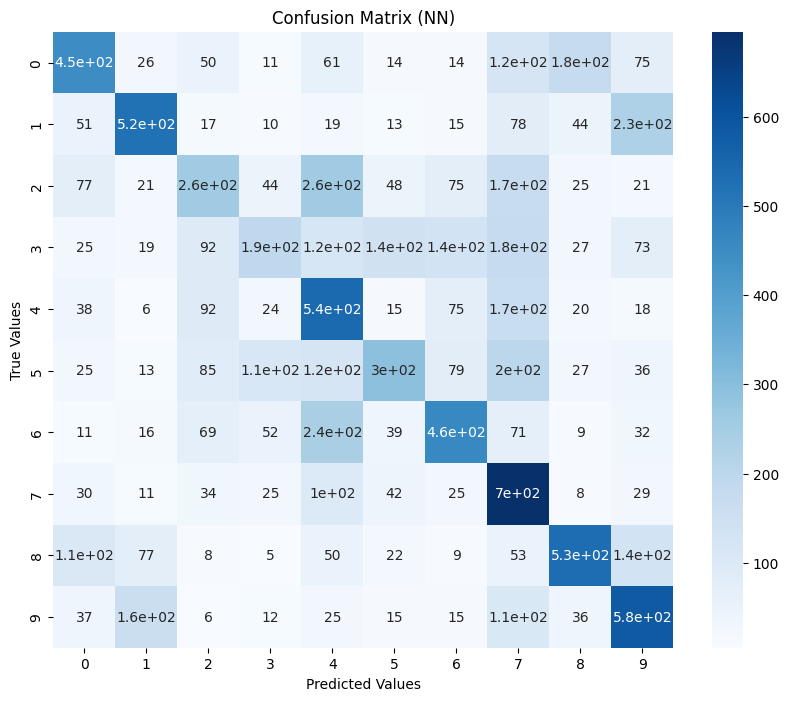

In [89]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test,np.argmax(nn.predict(X_test),axis = 1)), annot = True,cmap = "Blues")
plt.title("Confusion Matrix (NN)")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Training CNN

In [69]:
cnn = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(filters = 16, kernel_size = (3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation = 'relu'),
    Dense(50,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3424 - loss: 1.7968
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5366 - loss: 1.2958
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5954 - loss: 1.1435
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6304 - loss: 1.0454
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6576 - loss: 0.9797
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6729 - loss: 0.9231
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6978 - loss: 0.8653
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7041 - loss: 0.8398
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7210 - loss: 0.7959
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7317 - loss: 0.7623


In [71]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6744 - loss: 0.9771


[0.9745835065841675, 0.6722000241279602]

In [74]:
print(classification_report(y_test,np.argmax(cnn.predict(X_test),axis = 1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.80      0.79      0.80      1000
           2       0.52      0.62      0.56      1000
           3       0.48      0.50      0.49      1000
           4       0.68      0.53      0.60      1000
           5       0.63      0.47      0.54      1000
           6       0.71      0.80      0.75      1000
           7       0.73      0.76      0.74      1000
           8       0.71      0.83      0.77      1000
           9       0.81      0.71      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


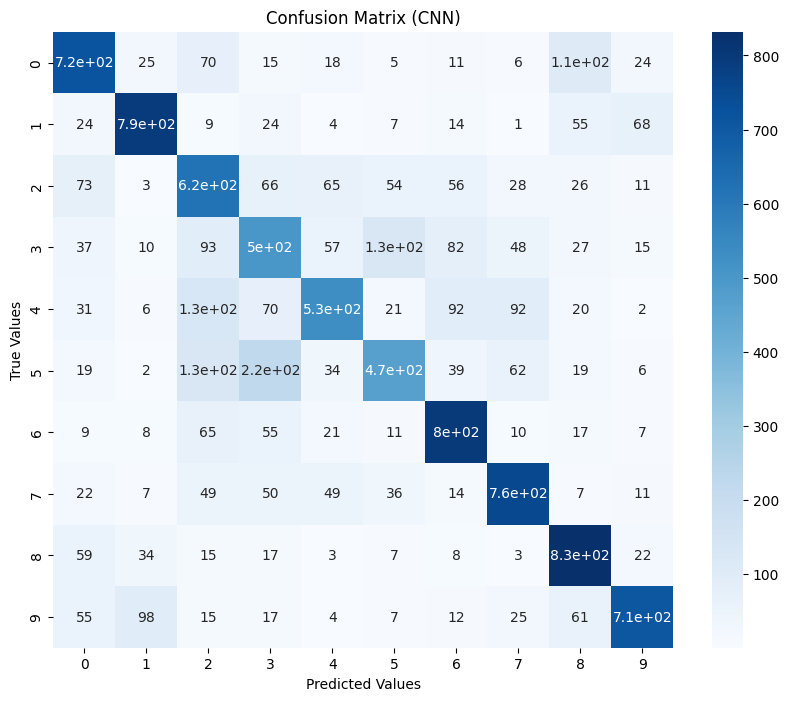

In [85]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test,np.argmax(cnn.predict(X_test),axis = 1)), annot = True,cmap = "Blues")
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()